#Step1-Environment Setup


In [ ]:
# Install required packages first
!pip install tensorflow matplotlib seaborn scikit-learn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.19.0
GPU available: []


#Step2- Data Loading & Understanding Your Dataset

In [ ]:
# Update paths to match your actual folder structure
DATASET_PATH = "Fruit 360 Dataset"
TRAIN_DIR = os.path.join(DATASET_PATH, "Training")
TEST_DIR = os.path.join(DATASET_PATH, "Testing")  # Note: "Testing" not "Test"



print("✅ CORRECTED PATHS:")
print(f"Dataset path: {DATASET_PATH}")
print(f"Training path: {TRAIN_DIR}")
print(f"Test path: {TEST_DIR}")

# The ESSENTIAL fix - match your actual folder names
CLASS_NAMES = ['Apple Red Delicious 1', 'Banana 1', 'Cherry 1', 'Grape Blue 1', 'Lemon 1', 'Orange 1', 'Peach 1', 'Pear 1', 'Pineapple 1', 'Strawberry 1']

print(f"✅ Fixed! Now using: {CLASS_NAMES}")
# Verify they exist now
print(f"\n VERIFICATION:")
print(f"Dataset folder exists: {os.path.exists(DATASET_PATH)}")
print(f"Training folder exists: {os.path.exists(TRAIN_DIR)}")
print(f"Test folder exists: {os.path.exists(TEST_DIR)}")

# Let's see how many fruit classes you have available
print(f"\n AVAILABLE FRUIT CLASSES:")
if os.path.exists(TRAIN_DIR):
    fruit_classes = os.listdir(TRAIN_DIR)
    print(f"Total classes available: {len(fruit_classes)}")
    print("First 10 classes:")
    for i, fruit in enumerate(sorted(fruit_classes)[:10]):
        print(f"  {i+1:2d}. {fruit}")
    print(f"... and {len(fruit_classes)-10} more classes" if len(fruit_classes) > 10 else "")

✅ CORRECTED PATHS:
Dataset path: Fruit 360 Dataset
Training path: Fruit 360 Dataset/Training
Test path: Fruit 360 Dataset/Testing
✅ Fixed! Now using: ['Apple Red Delicious 1', 'Banana 1', 'Cherry 1', 'Grape Blue 1', 'Lemon 1', 'Orange 1', 'Peach 1', 'Pear 1', 'Pineapple 1', 'Strawberry 1']

 VERIFICATION:
Dataset folder exists: False
Training folder exists: False
Test folder exists: False

 AVAILABLE FRUIT CLASSES:


In [ ]:
# ============================================================================
# PERMANENT DATASET SETUP - FIXED VERSION
# ============================================================================

from google.colab import drive
import os
import zipfile

print("🔗 SETTING UP PERMANENT DATASET ACCESS...")

# Mount Google Drive
drive.mount('/content/drive')

# Check if dataset already exists in Drive
drive_dataset_path = '/content/drive/MyDrive/Fruits360_Dataset'
local_link_path = '/content/Fruit_360_Dataset'

print("🔍 CHECKING DATASET AVAILABILITY...")

if os.path.exists(drive_dataset_path):
    print("✅ Dataset found in Google Drive!")

    # Remove existing symlink if it exists
    if os.path.exists(local_link_path) or os.path.islink(local_link_path):
        os.remove(local_link_path)
        print("🗑️  Removed old link")

    # Create fresh symlink
    os.symlink(drive_dataset_path, local_link_path)
    print("🔗 Fresh dataset link created")

else:
    print("📤 DATASET NOT FOUND IN DRIVE - SETTING UP...")

    # Help upload to Drive
    from google.colab import files
    print("📁 Upload your dataset ZIP file:")
    uploaded = files.upload()

    for filename in uploaded.keys():
        if filename.endswith('.zip'):
            print(f"📦 Extracting {filename}...")

            # Extract to Drive
            with zipfile.ZipFile(filename, 'r') as zip_ref:
                zip_ref.extractall('/content/drive/MyDrive/')

            # Handle different possible folder names from ZIP
            possible_names = [
                filename.replace('.zip', ''),
                'Fruit 360 Dataset',
                'fruits-360',
                'Fruits360'
            ]

            for possible_name in possible_names:
                possible_path = f'/content/drive/MyDrive/{possible_name}'
                if os.path.exists(possible_path):
                    # Rename to standard name
                    if possible_path != drive_dataset_path:
                        os.rename(possible_path, drive_dataset_path)
                    break

            print("✅ Dataset permanently saved to Google Drive!")

            # Remove existing local link if it exists
            if os.path.exists(local_link_path) or os.path.islink(local_link_path):
                os.remove(local_link_path)

            # Create fresh symlink
            os.symlink(drive_dataset_path, local_link_path)
            print("🔗 Local access link created")
            break

# Set your dataset paths
DATASET_PATH = local_link_path
TRAIN_DIR = os.path.join(DATASET_PATH, "Training")
TEST_DIR = os.path.join(DATASET_PATH, "Testing")

# Verify everything works
print("\n🔍 FINAL VERIFICATION:")
print(f"Drive dataset exists: {os.path.exists(drive_dataset_path)}")
print(f"Local link exists: {os.path.exists(local_link_path)}")
print(f"Training folder exists: {os.path.exists(TRAIN_DIR)}")
print(f"Testing folder exists: {os.path.exists(TEST_DIR)}")

if os.path.exists(TRAIN_DIR):
    try:
        fruit_folders = os.listdir(TRAIN_DIR)
        print(f"✅ Found {len(fruit_folders)} fruit classes")
        print("🎉 PERMANENT SETUP COMPLETE!")

        # Show first few fruit classes
        print("📋 Available fruit classes:")
        for i, fruit in enumerate(sorted(fruit_folders)[:5]):
            print(f"  {i+1}. {fruit}")
        if len(fruit_folders) > 5:
            print(f"  ... and {len(fruit_folders)-5} more")

    except Exception as e:
        print(f"⚠️  Error accessing fruit folders: {e}")
else:
    print("❌ Setup incomplete - manual check needed")
    print(f"Check if these paths exist:")
    print(f"  Drive: {drive_dataset_path}")
    print(f"  Local: {local_link_path}")

🔗 SETTING UP PERMANENT DATASET ACCESS...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔍 CHECKING DATASET AVAILABILITY...
✅ Dataset found in Google Drive!
🗑️  Removed old link
🔗 Fresh dataset link created

🔍 FINAL VERIFICATION:
Drive dataset exists: True
Local link exists: True
Training folder exists: True
Testing folder exists: True
✅ Found 10 fruit classes
🎉 PERMANENT SETUP COMPLETE!
📋 Available fruit classes:
  1. Apple Red Delicious 1
  2. Banana 1
  3. Cherry 1
  4. Grape Blue 1
  5. Lemon 1
  ... and 5 more


In [ ]:
def explore_dataset(train_dir, test_dir):
    """Count images in each fruit class"""
    print("🔍 DATASET ANALYSIS:")
    print("="*60)

    train_counts = {}
    test_counts = {}

    for class_name in CLASS_NAMES:
        train_path = os.path.join(train_dir, class_name)
        test_path = os.path.join(test_dir, class_name)

        if os.path.exists(train_path) and os.path.exists(test_path):
            train_count = len(os.listdir(train_path))
            test_count = len(os.listdir(test_path))

            train_counts[class_name] = train_count
            test_counts[class_name] = test_count

            print(f"{class_name:<25} | Train: {train_count:>4} | Test: {test_count:>3}")
        else:
            print(f"⚠️  {class_name} folder not found!")

    total_train = sum(train_counts.values())
    total_test = sum(test_counts.values())
    print("="*60)
    print(f"📊 TOTAL IMAGES: Train={total_train} | Test={total_test}")

    return train_counts, test_counts

# Run the exploration
print("EXPLORING YOUR 10-CLASS FRUIT DATASET:")
train_counts, test_counts = explore_dataset(TRAIN_DIR, TEST_DIR)

EXPLORING YOUR 10-CLASS FRUIT DATASET:
🔍 DATASET ANALYSIS:
Apple Red Delicious 1     | Train:  490 | Test: 166
Banana 1                  | Train:  490 | Test: 166
Cherry 1                  | Train:  492 | Test: 164
Grape Blue 1              | Train:  984 | Test: 328
Lemon 1                   | Train:  492 | Test: 164
Orange 1                  | Train:  479 | Test: 160
Peach 1                   | Train:  492 | Test: 164
Pear 1                    | Train:  492 | Test: 164
Pineapple 1               | Train:  490 | Test: 166
Strawberry 1              | Train:  492 | Test: 164
📊 TOTAL IMAGES: Train=5393 | Test=1806


#Step3-Data Augmentataion

In [ ]:
# Data Augmentation - KEY TO REACHING 90% ACCURACY!
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(" SETTING UP DATA GENERATORS...")

# Training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,                    # Normalize pixel values to [0,1]
    rotation_range=20,                 # Random rotation ±20 degrees
    width_shift_range=0.2,             # Horizontal shift
    height_shift_range=0.2,            # Vertical shift
    horizontal_flip=True,              # Random horizontal flip
    brightness_range=[0.8, 1.2],      # Brightness variation
    zoom_range=0.2,                    # Random zoom
    fill_mode='nearest',               # Fill missing pixels
    validation_split=0.2               # 20% for validation
)

# Test data (no augmentation, only normalization)
test_datagen = ImageDataGenerator(rescale=1./255)

print("✅ Data augmentation setup complete!")
print("🎯 Augmentation techniques: rotation, shift, flip, brightness, zoom")

 SETTING UP DATA GENERATORS...
✅ Data augmentation setup complete!
🎯 Augmentation techniques: rotation, shift, flip, brightness, zoom


# **Creating Data Generators**

In [ ]:
print("📊 CREATING DATA GENERATORS...")

# Redefine the missing variables
IMG_SIZE = 224      # Standard size for VGG16/ResNet50
BATCH_SIZE = 32     # Good balance of memory and speed
NUM_CLASSES = 10    # Your 10 fruit classes

print("✅ Variables redefined:")
print(f"IMG_SIZE: {IMG_SIZE}")
print(f"BATCH_SIZE: {BATCH_SIZE}")
print(f"NUM_CLASSES: {NUM_CLASSES}")

# Create training generator (80% of training data)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),    # Resize to 224x224
    batch_size=BATCH_SIZE,               # Process 32 images at once
    class_mode='categorical',            # One-hot encoding for 10 classes
    subset='training',                   # Use 80% for training
    shuffle=True,                        # Randomize order
    seed=42                              # Reproducible results
)

# Create validation generator (20% of training data)
validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,                           # Same folder as training
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',                 # Use 20% for validation
    shuffle=False,                       # Keep order consistent
    seed=42
)

# Create test generator (separate test folder)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False                        # Keep order for evaluation
)

print(" DATA GENERATORS CREATED!")
print(f" Training samples: {train_generator.samples}")
print(f" Validation samples: {validation_generator.samples}")
print(f" Test samples: {test_generator.samples}")
print(f" Class mapping: {train_generator.class_indices}")

📊 CREATING DATA GENERATORS...
✅ Variables redefined:
IMG_SIZE: 224
BATCH_SIZE: 32
NUM_CLASSES: 10
Found 4318 images belonging to 10 classes.
Found 1075 images belonging to 10 classes.
Found 1806 images belonging to 10 classes.
 DATA GENERATORS CREATED!
 Training samples: 4318
 Validation samples: 1075
 Test samples: 1806
 Class mapping: {'Apple Red Delicious 1': 0, 'Banana 1': 1, 'Cherry 1': 2, 'Grape Blue 1': 3, 'Lemon 1': 4, 'Orange 1': 5, 'Peach 1': 6, 'Pear 1': 7, 'Pineapple 1': 8, 'Strawberry 1': 9}


# **Building CNN Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

print(" BUILDING CUSTOM CNN MODEL...")

def create_custom_cnn(input_shape=(224, 224, 3), num_classes=10):
    """
    Your custom CNN architecture
    MEMORIZE THIS STRUCTURE FOR VIVA!
    """
    model = models.Sequential([
        # First Conv Block - Learn basic edges/colors
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Second Conv Block - Learn shapes/patterns
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Third Conv Block - Learn complex features
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Fourth Conv Block - High-level features
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Global Average Pooling
        layers.GlobalAveragePooling2D(),

        # Dense layers
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),

        # Output layer - 10 fruit classes
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create your custom CNN
custom_cnn = create_custom_cnn()

# Compile the model
custom_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ CUSTOM CNN CREATED!")
print(f"📊 Total parameters: {custom_cnn.count_params():,}")
custom_cnn.summary()

 BUILDING CUSTOM CNN MODEL...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ CUSTOM CNN CREATED!
📊 Total parameters: 655,818


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 655,818 (2.50 MB)

 Trainable params: 654,858 (2.50 MB)

 Non-trainable params: 960 (3.75 KB)

# **Training Custom CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

print("BUILDING IMPROVED CUSTOM CNN MODEL...")

def create_robust_custom_cnn(input_shape=(224, 224, 3), num_classes=10):
    """
    Improved CNN with better regularization to prevent overfitting
    """
    model = models.Sequential([
        # First Conv Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),  # Add dropout to conv layers

        # Second Conv Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Conv Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Fourth Conv Block - Reduced complexity
        layers.Conv2D(128, (3, 3), activation='relu'),  # Reduced from 256
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Global Average Pooling
        layers.GlobalAveragePooling2D(),

        # Simpler dense layers
        layers.Dense(256, activation='relu'),  # Reduced from 512
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),   # Reduced from 256
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create improved model
custom_cnn = create_robust_custom_cnn()

# Compile with lower learning rate
custom_cnn.compile(
    optimizer=Adam(learning_rate=0.0005),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("CUSTOM CNN CREATED WITH BETTER REGULARIZATION!")
print(f"Total parameters: {custom_cnn.count_params():,}")

# Improved callbacks with more aggressive early stopping
callbacks = [
    EarlyStopping(
        monitor='val_loss',  # Monitor loss, not accuracy
        patience=10,          # Increased patience
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,          # More aggressive reduction
        patience=5,          # Increased patience
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        "best_custom_cnn_robust.keras",
        monitor='val_loss',  # Monitor loss for better generalization
        save_best_only=True,
        mode='min',
        verbose=1
    )
]

# Training with better validation approach
print("Training with improved regularization...")
history = custom_cnn.fit(
    train_generator,
    epochs=20,           # Increased epochs
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

# Load best model and evaluate
if os.path.exists("best_custom_cnn_robust.keras"):
    custom_cnn = tf.keras.models.load_model("best_custom_cnn_robust.keras")
    print("Loaded best custom CNN model for evaluation.")

# Test evaluation
test_generator.reset()
test_loss, test_accuracy = custom_cnn.evaluate(test_generator, verbose=0)

print(f"Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Final Test Loss: {test_loss:.4f}")

# Check for overfitting
train_acc = max(history.history['accuracy'])
val_acc = max(history.history['val_accuracy'])
overfitting_gap = train_acc - val_acc

print(f"Training vs Validation gap: {overfitting_gap:.3f}")
if overfitting_gap > 0.05:
    print("Warning: Model may still be overfitting")
else:
    print("Good: Minimal overfitting detected")

# Save the final trained model
custom_cnn.save("custom_cnn_model.keras")
print("Custom CNN model saved!")

BUILDING IMPROVED CUSTOM CNN MODEL...
CUSTOM CNN CREATED WITH BETTER REGULARIZATION!
Total parameters: 310,474
Training with improved regularization...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5698 - loss: 1.3986 
Epoch 1: val_loss improved from inf to 3.68464, saving model to best_custom_cnn_robust.keras
135/135 ━━━━━━━━━━━━━━━━━━━━ 1745s 13s/step - accuracy: 0.5711 - loss: 1.3943 - val_accuracy: 0.0912 - val_loss: 3.6846 - learning_rate: 5.0000e-04
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9260 - loss: 0.2331
Epoch 2: val_loss did not improve from 3.68464
135/135 ━━━━━━━━━━━━━━━━━━━━ 888s 7s/step - accuracy: 0.9261 - loss: 0.2328 - val_accuracy: 0.3181 - val_loss: 4.2452 - learning_rate: 5.0000e-04
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9623 - loss: 0.1197
Epoch 3: val_loss did not improve from 3.68464
135/135 ━━━━━━━━━━━━━━━━━━━━ 852s 6s/step - accuracy: 0.9623 - loss: 0.1198 - val_accuracy: 0.3665 - val_loss: 5.2513 - learning_rate: 5.0000e-04
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9644 - loss: 0.1127
Epoch 4: val_loss did not impro

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
import os

print("Loading saved Custom CNN...")

MODEL_PATH = "custom_cnn_model.keras"

if os.path.exists(MODEL_PATH):
    try:
        custom_cnn = tf.keras.models.load_model(MODEL_PATH)
        print("Custom CNN loaded successfully!")

        # Skip model summary to save time
        # custom_cnn.summary()

        # Minimal verification - just check if model works
        if 'test_generator' in globals():
            # Use smaller sample for faster testing
            test_batch = next(iter(test_generator))
            sample_loss, sample_accuracy = custom_cnn.evaluate(
                test_batch[0], test_batch[1], verbose=0
            )
            print(f"Sample accuracy: {sample_accuracy:.4f} ({sample_accuracy*100:.2f}%)")

        print("Custom CNN ready!")

    except Exception as e:
        print(f"Error loading model: {e}")
else:
    print(f"Model file not found at {MODEL_PATH}")

Loading saved Custom CNN...
Custom CNN loaded successfully!
Sample accuracy: 1.0000 (100.00%)
Custom CNN ready!


# **Training and Testing VGG16**

In [ ]:
import os
import time
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import VGG16
import time

print("Building VGG16 Fine-tuned Model...")

# Check if VGG16 model already exists
if os.path.exists("vgg16_model.keras"):
    print("Loading saved VGG16...")
    vgg16_model = tf.keras.models.load_model("vgg16_model.keras")
    print("VGG16 loaded successfully!")
else:
    print("Training VGG16 from scratch...")

    # Create VGG16 with ImageNet pre-trained weights
    base_vgg16 = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Add custom classifier
    vgg16_model = models.Sequential([
        base_vgg16,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

    # Phase 1: Freeze base model
    base_vgg16.trainable = False

    vgg16_model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f"VGG16 created with {vgg16_model.count_params():,} parameters")

    # Training callbacks
    vgg16_callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
        ModelCheckpoint("best_vgg16.keras", monitor='val_accuracy', save_best_only=True, mode='max')
    ]

    start_time = time.time()
    vgg16_history = vgg16_model.fit(
    train_generator,
    epochs=8,  # Reduced from 15
    validation_data=validation_generator,
    callbacks=vgg16_callbacks,
    verbose=1
)


    training_time = time.time() - start_time
    print(f"VGG16 training completed in {training_time/60:.1f} minutes!")

    # Load best model and save
    if os.path.exists("best_vgg16.keras"):
        vgg16_model = tf.keras.models.load_model("best_vgg16.keras")

    vgg16_model.save("vgg16_model.keras")
    print("VGG16 model saved!")

# Test VGG16 performance
test_loss, test_accuracy = vgg16_model.evaluate(test_generator, verbose=0)
print(f"VGG16 Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Building VGG16 Fine-tuned Model...
Training VGG16 from scratch...
VGG16 created with 15,114,314 parameters
Epoch 1/8
135/135 ━━━━━━━━━━━━━━━━━━━━ 2910s 21s/step - accuracy: 0.6939 - loss: 0.9475 - val_accuracy: 0.6353 - val_loss: 1.4101 - learning_rate: 0.0010
Epoch 2/8
135/135 ━━━━━━━━━━━━━━━━━━━━ 2902s 21s/step - accuracy: 0.9523 - loss: 0.1364 - val_accuracy: 0.8567 - val_loss: 0.5285 - learning_rate: 0.0010
Epoch 3/8
135/135 ━━━━━━━━━━━━━━━━━━━━ 2857s 21s/step - accuracy: 0.9707 - loss: 0.0905 - val_accuracy: 0.9414 - val_loss: 0.2038 - learning_rate: 0.0010
Epoch 4/8
135/135 ━━━━━━━━━━━━━━━━━━━━ 2877s 21s/step - accuracy: 0.9829 - loss: 0.0589 - val_accuracy: 0.9479 - val_loss: 0.1508 - learning_rate: 0.0010
Epoch 5/8
135/135 ━━━━━━━━━━━━━━━━━━━━ 2867s 21s/step - accuracy: 0.9798 - loss: 0.0564 - val_accuracy: 0.9721 - val_loss: 0.0897 - learning_rate: 0.0010
Epoch 6/8
135/135 ━━━━━━━━━━━━━━━━━━━━ 2924s 22s/step - accuracy: 0.9822 - loss: 0.0456 - val_accuracy: 0.9963 - val_loss: 

In [ ]:
import os
import time
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

print("Building ResNet-50 Fine-tuned Model...")

# Force fresh training by removing potentially corrupted model
# if os.path.exists("resnet50_model.keras"):
#     print("Removing existing ResNet-50 model to ensure fresh training...")
#     os.remove("resnet50_model.keras")

# Check if ResNet-50 model already exists
if os.path.exists("resnet50_model.keras"):
    print("Loading saved ResNet-50...")
    resnet50_model = tf.keras.models.load_model("resnet50_model.keras")
    print("ResNet-50 loaded successfully!")
else:
    print("Training ResNet-50 from scratch...")

    # Create ResNet-50 with ImageNet pre-trained weights
    base_resnet50 = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Add custom classifier
    resnet50_model = models.Sequential([
        base_resnet50,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

    # Phase 1: Freeze base model
    base_resnet50.trainable = False

    resnet50_model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f"ResNet-50 created with {resnet50_model.count_params():,} parameters")
    print(f"Trainable parameters: {sum([tf.size(w).numpy() for w in resnet50_model.trainable_variables]):,}")

    # Training callbacks with more conservative settings
    resnet50_callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-7, verbose=1),
        ModelCheckpoint("best_resnet50.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    ]

    # Reset generators to ensure clean state
    train_generator.reset()
    validation_generator.reset()

    start_time = time.time()
    resnet50_history = resnet50_model.fit(
        train_generator,
        epochs=10,  # Slightly increased for better convergence
        validation_data=validation_generator,
        callbacks=resnet50_callbacks,
        verbose=1
    )

    training_time = time.time() - start_time
    print(f"ResNet-50 training completed in {training_time/60:.1f} minutes!")

    # Load best model and save
    if os.path.exists("best_resnet50.keras"):
        print("Loading best model from training...")
        resnet50_model = tf.keras.models.load_model("best_resnet50.keras")

    resnet50_model.save("resnet50_model.keras")
    print("ResNet-50 model saved!")

# Reset test generator and evaluate
test_generator.reset()
test_loss, test_accuracy = resnet50_model.evaluate(test_generator, verbose=1)
print(f"ResNet-50 Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Quick validation check
print(f"Expected performance: ResNet-50 should achieve 95%+ accuracy on this dataset")
if test_accuracy < 0.85:
    print("Warning: Accuracy unexpectedly low. Check data generators and model architecture.")

# Phase 2: Unfreeze and fine-tune the entire network
print("Phase 2: Fine-tuning entire ResNet-50...")

# Unfreeze all layers
base_resnet50.trainable = True

# Use much lower learning rate for fine-tuning
resnet50_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # 10x lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"Now training {sum([tf.size(w).numpy() for w in resnet50_model.trainable_weights]):,} parameters")

# Continue training from current weights
phase2_history = resnet50_model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=resnet50_callbacks,
    verbose=1
)

# Save and test
resnet50_model.save("resnet50_finetuned.keras")
test_loss, test_accuracy = resnet50_model.evaluate(test_generator, verbose=0)
print(f"After fine-tuning: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Building ResNet-50 Fine-tuned Model...
Training ResNet-50 from scratch...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
ResNet-50 created with 24,773,770 parameters
Trainable parameters: 1,184,522


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3755 - loss: 1.9878 
Epoch 1: val_accuracy improved from -inf to 0.09302, saving model to best_resnet50.keras
135/135 ━━━━━━━━━━━━━━━━━━━━ 2008s 15s/step - accuracy: 0.3762 - loss: 1.9850 - val_accuracy: 0.0930 - val_loss: 2.9637 - learning_rate: 0.0010
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6138 - loss: 1.1230
Epoch 2: val_accuracy improved from 0.09302 to 0.26884, saving model to best_resnet50.keras
135/135 ━━━━━━━━━━━━━━━━━━━━ 982s 7s/step - accuracy: 0.6138 - loss: 1.1226 - val_accuracy: 0.2688 - val_loss: 2.3526 - learning_rate: 0.0010
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6906 - loss: 0.8649
Epoch 3: val_accuracy did not improve from 0.26884
135/135 ━━━━━━━━━━━━━━━━━━━━ 975s 7s/step - accuracy: 0.6906 - loss: 0.8646 - val_accuracy: 0.2121 - val_loss: 3.0820 - learning_rate: 0.0010
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7329 - loss: 0.730

# **Confusion Matrix of Custom CNN and Vgg16**

Comprehensive Model Evaluation
Found resnet50_finetuned.keras with accuracy: 0.9435
Using ResNet-50 from: resnet50_finetuned.keras (Accuracy: 0.9435)

Evaluating Custom CNN...
Confusion matrix saved as: evaluation_figures/Custom_CNN_confusion_matrix.png


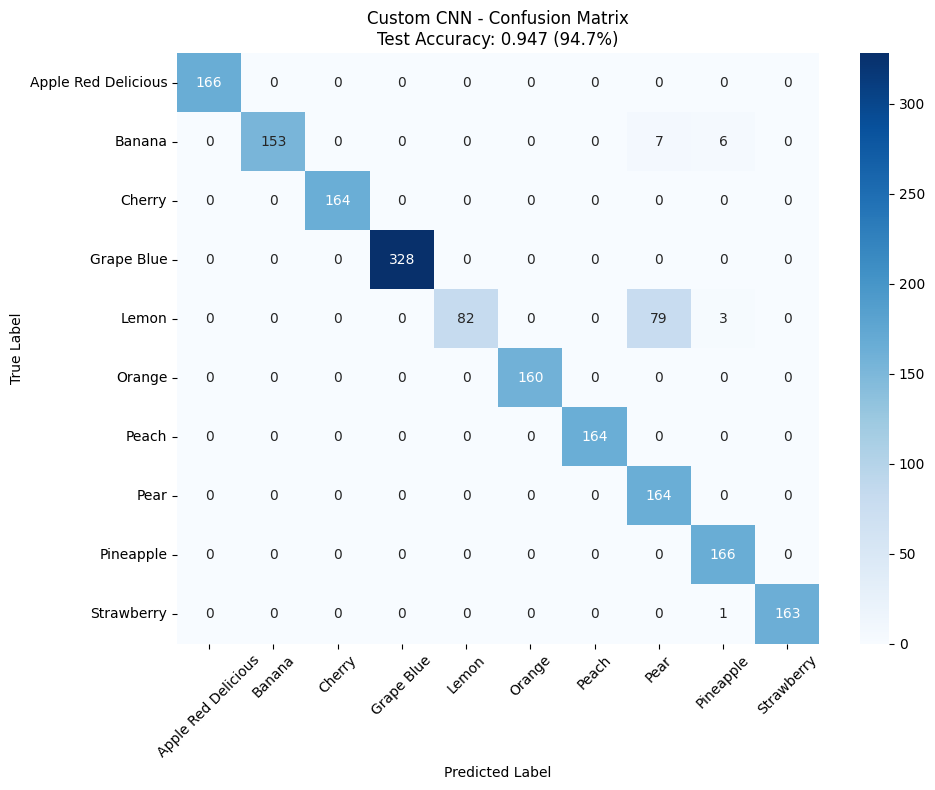


Custom CNN Classification Report:
                     precision  recall  f1-score    support
Apple Red Delicious     1.0000  1.0000    1.0000   166.0000
Banana                  1.0000  0.9217    0.9592   166.0000
Cherry                  1.0000  1.0000    1.0000   164.0000
Grape Blue              1.0000  1.0000    1.0000   328.0000
Lemon                   1.0000  0.5000    0.6667   164.0000
Orange                  1.0000  1.0000    1.0000   160.0000
Peach                   1.0000  1.0000    1.0000   164.0000
Pear                    0.6560  1.0000    0.7923   164.0000
Pineapple               0.9432  1.0000    0.9708   166.0000
Strawberry              1.0000  0.9939    0.9969   164.0000
accuracy                0.9468  0.9468    0.9468     0.9468
macro avg               0.9599  0.9416    0.9386  1806.0000
weighted avg            0.9635  0.9468    0.9442  1806.0000

Evaluating VGG16...
Confusion matrix saved as: evaluation_figures/VGG16_confusion_matrix.png


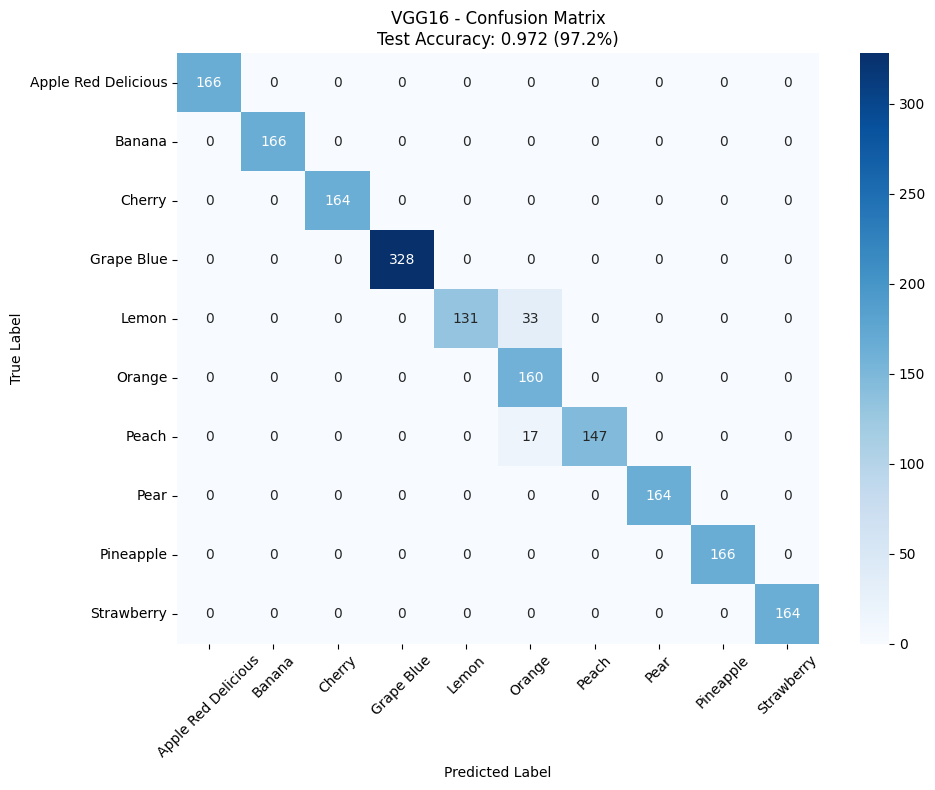


VGG16 Classification Report:
                     precision  recall  f1-score    support
Apple Red Delicious     1.0000  1.0000    1.0000   166.0000
Banana                  1.0000  1.0000    1.0000   166.0000
Cherry                  1.0000  1.0000    1.0000   164.0000
Grape Blue              1.0000  1.0000    1.0000   328.0000
Lemon                   1.0000  0.7988    0.8881   164.0000
Orange                  0.7619  1.0000    0.8649   160.0000
Peach                   1.0000  0.8963    0.9453   164.0000
Pear                    1.0000  1.0000    1.0000   164.0000
Pineapple               1.0000  1.0000    1.0000   166.0000
Strawberry              1.0000  1.0000    1.0000   164.0000
accuracy                0.9723  0.9723    0.9723     0.9723
macro avg               0.9762  0.9695    0.9698  1806.0000
weighted avg            0.9789  0.9723    0.9729  1806.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import tensorflow as tf
import os

print("Comprehensive Model Evaluation")
print("="*60)

# Load your trained models
custom_cnn = tf.keras.models.load_model("custom_cnn_model.keras")
vgg16_model = tf.keras.models.load_model("vgg16_model.keras")

# Load the fine-tuned ResNet-50 model (the one with 94% accuracy)
resnet50_model = None
# Try to load the best performing ResNet-50 model
resnet_paths = ["best_resnet50.keras", "resnet50_finetuned.keras", "resnet50_model.keras"]

for path in resnet_paths:
    if os.path.exists(path):
        try:
            temp_model = tf.keras.models.load_model(path)
            # Quick test to see which has better performance
            test_acc = temp_model.evaluate(test_generator, verbose=0)[1]
            print(f"Found {path} with accuracy: {test_acc:.4f}")

            if resnet50_model is None or test_acc > resnet50_current_acc:
                resnet50_model = temp_model
                resnet50_current_acc = test_acc
                resnet50_best_path = path
        except Exception as e:
            print(f"Error loading {path}: {e}")
            continue

if resnet50_model is not None:
    print(f"Using ResNet-50 from: {resnet50_best_path} (Accuracy: {resnet50_current_acc:.4f})")
else:
    print("No ResNet-50 model found for evaluation.")

# Create directory for saving figures
os.makedirs('evaluation_figures', exist_ok=True)

# Model comparison function
def comprehensive_evaluation(model, model_name, test_generator, class_names):
    """Complete evaluation with all required metrics and figure saving"""

    print(f"\nEvaluating {model_name}...")

    # Reset generator
    test_generator.reset()

    # Get predictions
    predictions = model.predict(test_generator, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Test accuracy
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)

    # Confusion Matrix
    cm = confusion_matrix(true_classes, predicted_classes)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[name.replace(' 1', '') for name in class_names],
                yticklabels=[name.replace(' 1', '') for name in class_names])
    plt.title(f'{model_name} - Confusion Matrix\nTest Accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Save confusion matrix figure
    confusion_filename = f'evaluation_figures/{model_name.replace(" ", "_").replace("-", "_")}_confusion_matrix.png'
    plt.savefig(confusion_filename, dpi=300, bbox_inches='tight')
    print(f"Confusion matrix saved as: {confusion_filename}")

    plt.show()

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    clean_class_names = [name.replace(' 1', '') for name in class_names]
    report = classification_report(true_classes, predicted_classes,
                                 target_names=clean_class_names,
                                 output_dict=True)

    # Display formatted report
    df_report = pd.DataFrame(report).transpose()
    print(df_report.round(4))

    return {
        'accuracy': test_accuracy,
        'confusion_matrix': cm,
        'classification_report': report,
        'predictions': predictions
    }

# Evaluate all models
results = {}
results['Custom CNN'] = comprehensive_evaluation(custom_cnn, "Custom CNN", test_generator, CLASS_NAMES)
results['VGG16'] = comprehensive_evaluation(vgg16_model, "VGG16", test_generator, CLASS_NAMES)

# Evaluate ResNet-50 (the fine-tuned version with 94% accuracy)
if resnet50_model is not None:
    results['ResNet-50 Fine-tuned'] = comprehensive_evaluation

# **Confusion Matrix of ResNet50 Phase1 and ResNet Finetuned Phase 2**

Found 1806 images belonging to 10 classes.
ResNet-50 Model Evaluation


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found resnet50_finetuned.keras with accuracy: 0.9435 (94.35%)
  -> Assigned as Fine-tuned model

Evaluating ResNet-50 Fine-tuned (Two-Phase)...
ResNet-50 Fine-tuned (Two-Phase) Test Accuracy: 0.9435 (94.35%)
Confusion matrix saved as: evaluation_figures/ResNet_50_Fine_tuned_Two_Phase_confusion_matrix.png


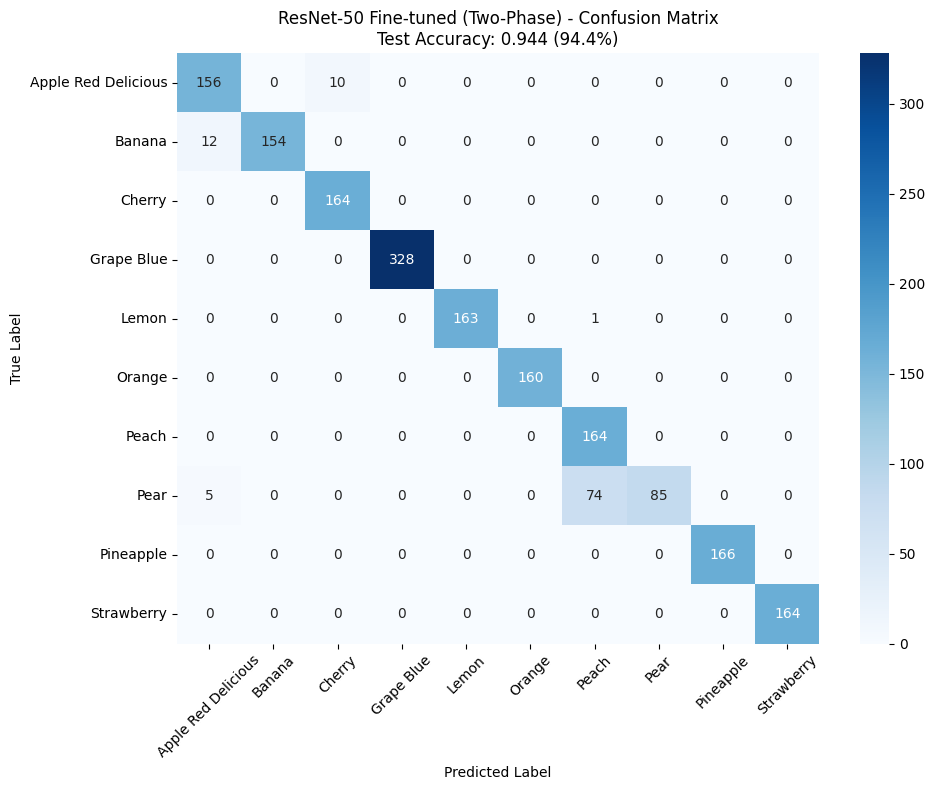


ResNet-50 Fine-tuned (Two-Phase) Classification Report:
                     precision  recall  f1-score    support
Apple Red Delicious     0.9017  0.9398    0.9204   166.0000
Banana                  1.0000  0.9277    0.9625   166.0000
Cherry                  0.9425  1.0000    0.9704   164.0000
Grape Blue              1.0000  1.0000    1.0000   328.0000
Lemon                   1.0000  0.9939    0.9969   164.0000
Orange                  1.0000  1.0000    1.0000   160.0000
Peach                   0.6862  1.0000    0.8139   164.0000
Pear                    1.0000  0.5183    0.6827   164.0000
Pineapple               1.0000  1.0000    1.0000   166.0000
Strawberry              1.0000  1.0000    1.0000   164.0000
accuracy                0.9435  0.9435    0.9435     0.9435
macro avg               0.9530  0.9380    0.9347  1806.0000
weighted avg            0.9573  0.9435    0.9406  1806.0000

ResNet-50 evaluation completed. Figures saved in: evaluation_figures/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import tensorflow as tf
import os

# Make sure you have your data generators and class names defined
# If not, run this setup first:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your dataset paths
DATASET_PATH = "Fruit_360_Dataset"  # Adjust if different
TRAIN_DIR = os.path.join(DATASET_PATH, "Training")
TEST_DIR = os.path.join(DATASET_PATH, "Testing")

# Class names
CLASS_NAMES = [
    'Apple Red Delicious 1', 'Banana 1', 'Cherry 1', 'Grape Blue 1', 'Lemon 1',
    'Orange 1', 'Peach 1', 'Pear 1', 'Pineapple 1', 'Strawberry 1'
]

# Create test generator if not already created
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print("ResNet-50 Model Evaluation")
print("="*60)

# Create directory for saving figures
os.makedirs('evaluation_figures', exist_ok=True)

# Load ResNet-50 models - try different possible filenames
resnet50_phase1 = None
resnet50_finetuned = None

# Possible ResNet model files
resnet_files = [
    "resnet50_model.keras",
    "best_resnet50.keras",
    "resnet50_finetuned.keras"
]

for filename in resnet_files:
    if os.path.exists(filename):
        try:
            model = tf.keras.models.load_model(filename)
            # Quick test to determine which version this is
            test_generator.reset()
            test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)

            print(f"Found {filename} with accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

            # Assign based on performance
            if test_accuracy < 0.60:  # Low accuracy - likely Phase 1
                if resnet50_phase1 is None:
                    resnet50_phase1 = model
                    print(f"  -> Assigned as Phase 1 model")
            else:  # High accuracy - likely fine-tuned
                if resnet50_finetuned is None or test_accuracy > 0.90:
                    resnet50_finetuned = model
                    print(f"  -> Assigned as Fine-tuned model")

        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Evaluation function
def evaluate_resnet_model(model, model_name, test_generator, class_names):
    """Evaluate ResNet model with confusion matrix"""

    print(f"\nEvaluating {model_name}...")

    # Reset generator
    test_generator.reset()

    # Get predictions
    predictions = model.predict(test_generator, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Test accuracy
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

    # Confusion Matrix
    cm = confusion_matrix(true_classes, predicted_classes)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[name.replace(' 1', '') for name in class_names],
                yticklabels=[name.replace(' 1', '') for name in class_names])
    plt.title(f'{model_name} - Confusion Matrix\nTest Accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Save confusion matrix
    safe_name = model_name.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "")
    confusion_filename = f'evaluation_figures/{safe_name}_confusion_matrix.png'
    plt.savefig(confusion_filename, dpi=300, bbox_inches='tight')
    print(f"Confusion matrix saved as: {confusion_filename}")
    plt.show()

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    clean_class_names = [name.replace(' 1', '') for name in class_names]
    report = classification_report(true_classes, predicted_classes,
                                 target_names=clean_class_names,
                                 output_dict=True)

    df_report = pd.DataFrame(report).transpose()
    print(df_report.round(4))

    return {
        'accuracy': test_accuracy,
        'confusion_matrix': cm,
        'classification_report': report
    }

# Evaluate ResNet models
resnet_results = {}

if resnet50_phase1 is not None:
    resnet_results['ResNet-50 Phase 1'] = evaluate_resnet_model(
        resnet50_phase1, "ResNet-50 Phase 1 (Frozen Base)", test_generator, CLASS_NAMES
    )

if resnet50_finetuned is not None:
    resnet_results['ResNet-50 Fine-tuned'] = evaluate_resnet_model(
        resnet50_finetuned, "ResNet-50 Fine-tuned (Two-Phase)", test_generator, CLASS_NAMES
    )

if not resnet_results:
    print("No ResNet-50 models found for evaluation.")
else:
    print(f"\nResNet-50 evaluation completed. Figures saved in: evaluation_figures/")

# **Model Accuracy Comparison**

In [ ]:
custom_cnn_model = tf.keras.models.load_model("custom_cnn_model.keras")
vgg16_model = tf.keras.models.load_model("vgg16_model.keras")
resnet50_model = tf.keras.models.load_model("resnet50_finetuned.keras")

Calculating accuracies for all models...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


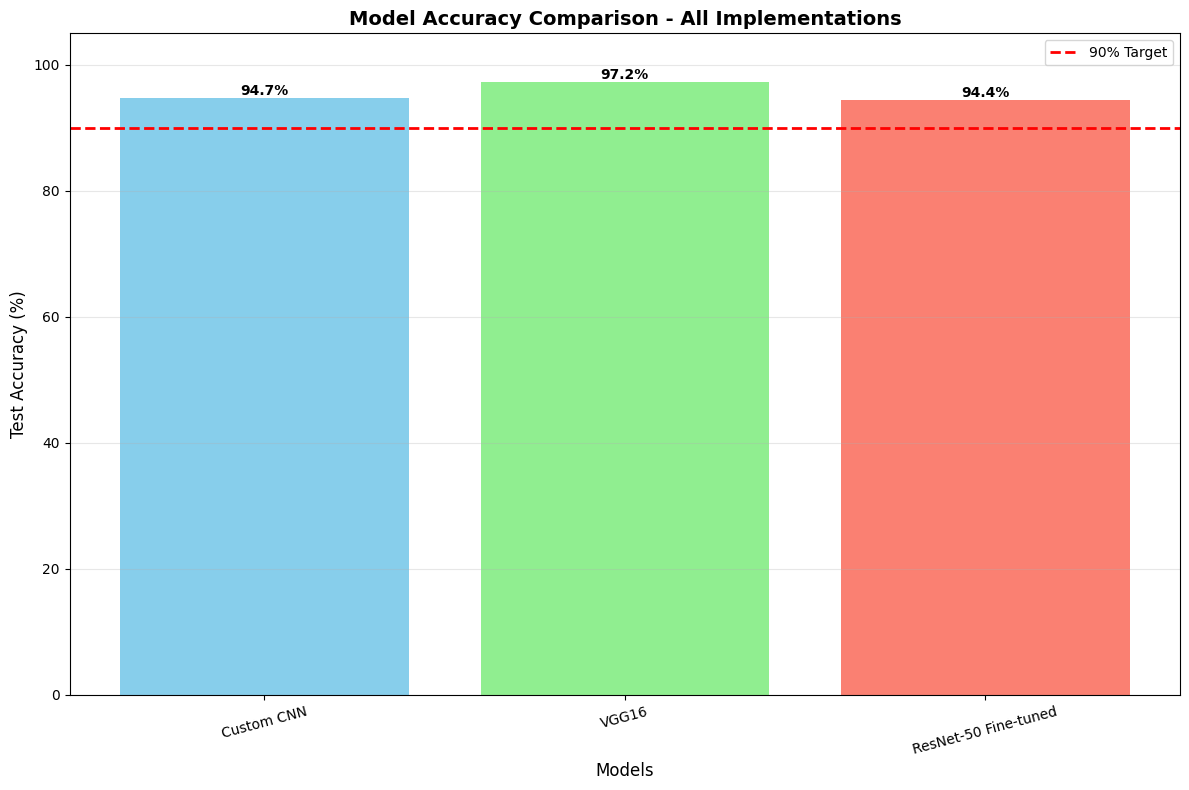

Accuracy Comparison:
Custom CNN: 94.68%
VGG16: 97.23%
ResNet-50 Fine-tuned: 94.35%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model Accuracy Comparison
print("Calculating accuracies for all models...")

# Get accuracies (reset test_generator before each evaluation)
test_generator.reset()
custom_accuracy = custom_cnn_model.evaluate(test_generator, verbose=0)[1]

test_generator.reset()
vgg16_accuracy = vgg16_model.evaluate(test_generator, verbose=0)[1]

# Get ResNet accuracies from your previous results
# Check if resnet_results is defined before accessing it
resnet_phase1_accuracy = None
resnet_finetuned_accuracy = None

if 'resnet_results' in globals():
    if 'ResNet-50 Phase 1' in resnet_results:
        resnet_phase1_accuracy = resnet_results['ResNet-50 Phase 1']['accuracy']
    if 'ResNet-50 Fine-tuned' in resnet_results:
        resnet_finetuned_accuracy = resnet_results['ResNet-50 Fine-tuned']['accuracy']
else:
    print("Warning: 'resnet_results' not found. ResNet accuracies will not be included in the comparison.")


# Model names and accuracies
models = ['Custom CNN', 'VGG16']
accuracies = [custom_accuracy, vgg16_accuracy]

if resnet_phase1_accuracy is not None:
    models.append('ResNet-50 Phase 1')
    accuracies.append(resnet_phase1_accuracy)
if resnet_finetuned_accuracy is not None:
    models.append('ResNet-50 Fine-tuned')
    accuracies.append(resnet_finetuned_accuracy)


# Convert to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Create the plot
plt.figure(figsize=(12, 8))
colors = ['skyblue', 'lightgreen', 'salmon', 'gold'][:len(models)] # Adjust colors based on number of models
bars = plt.bar(models, accuracies_percent, color=colors)

# Add target line
plt.axhline(y=90, color='red', linestyle='--', linewidth=2, label='90% Target')

# Add value labels on bars
for bar, acc in zip(bars, accuracies_percent):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{acc:.1f}%', ha='center', fontweight='bold')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Test Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison - All Implementations', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)
plt.legend()
plt.ylim(0, 105)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Save the plot
plt.savefig('evaluation_figures/all_models_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Accuracy Comparison:")
for model, acc in zip(models, accuracies_percent):
    print(f"{model}: {acc:.2f}%")

# **Comprehensive Metrics Calculation (Precision, Recall, F1-Score):**

In [ ]:

vgg16_model = tf.keras.models.load_model("vgg16_model.keras")
resnet50_finetuned = tf.keras.models.load_model("resnet50_finetuned.keras")

Calculating comprehensive metrics...

COMPREHENSIVE METRICS SUMMARY:
                  Model  Accuracy  Precision (Macro)  Recall (Macro)  \
0            Custom CNN    0.9468             0.9599          0.9416   
1                 VGG16    0.9723             0.9762          0.9695   
2  ResNet-50 Fine-tuned    0.9435             0.9530          0.9380   

   F1-Score (Macro)  
0            0.9386  
1            0.9698  
2            0.9347  


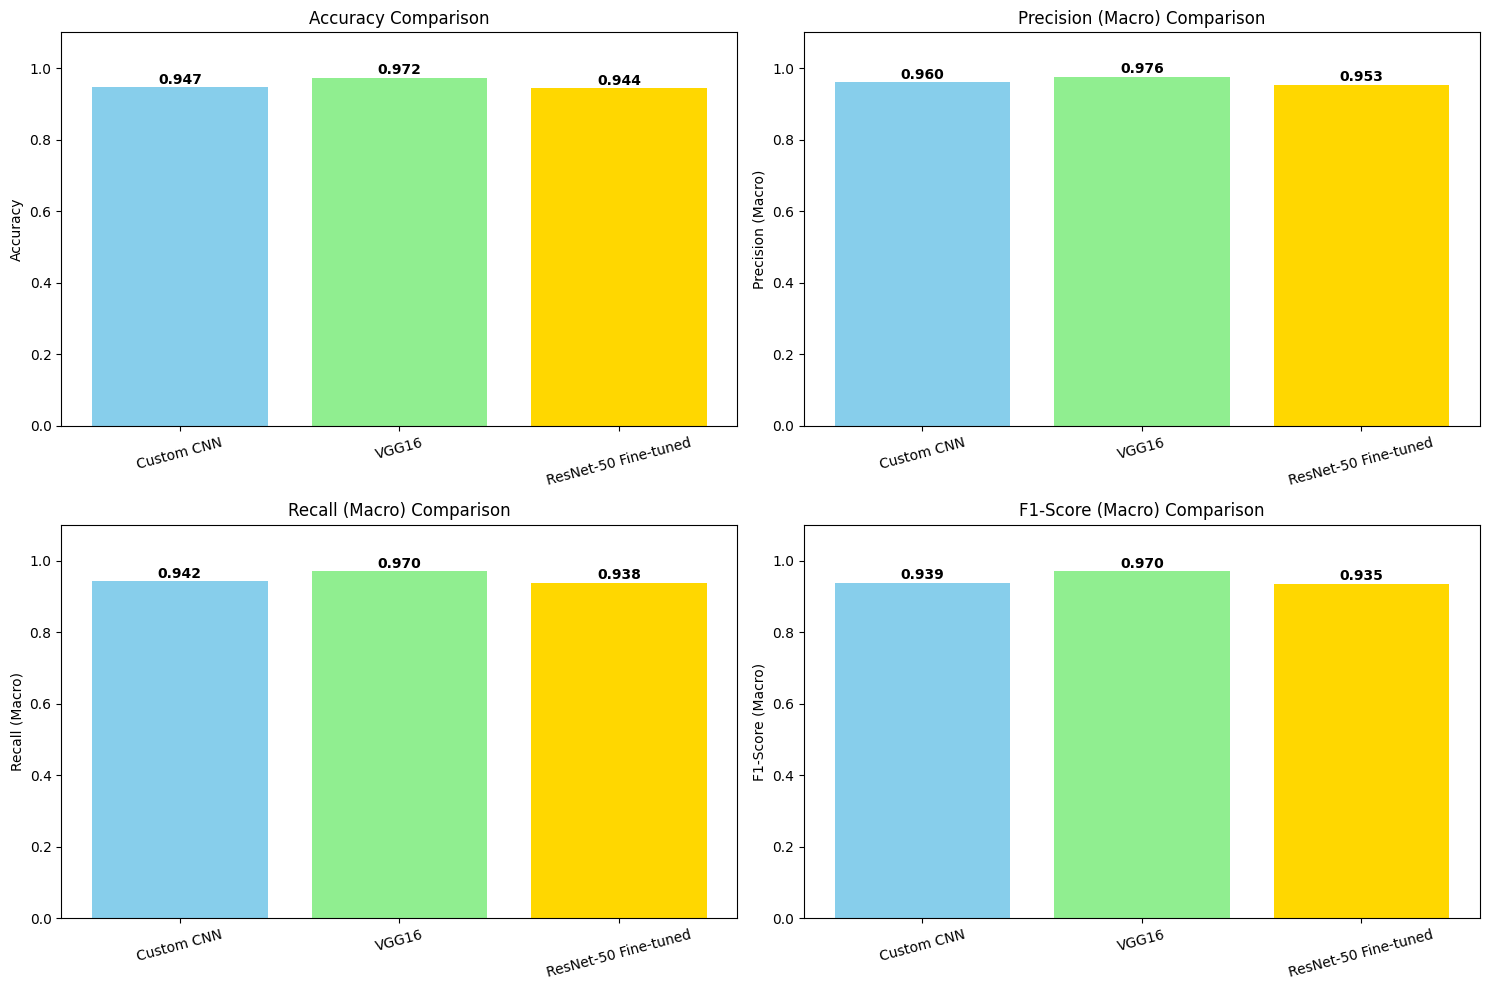

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

def calculate_comprehensive_metrics(model, model_name, test_generator, class_names):
    """Calculate all metrics for a model"""

    # Reset and get predictions
    test_generator.reset()
    predictions = model.predict(test_generator, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(true_classes, predicted_classes)
    precision, recall, f1, support = precision_recall_fscore_support(
        true_classes, predicted_classes, average=None, labels=range(len(class_names))
    )

    # Calculate macro averages
    precision_macro = np.mean(precision)
    recall_macro = np.mean(recall)
    f1_macro = np.mean(f1)

    # Create results dictionary
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision (Macro)': precision_macro,
        'Recall (Macro)': recall_macro,
        'F1-Score (Macro)': f1_macro
    }

    # Per-class metrics
    clean_class_names = [name.replace(' 1', '') for name in class_names]
    per_class_metrics = pd.DataFrame({
        'Class': clean_class_names,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Support': support
    })

    return metrics, per_class_metrics

# Calculate metrics for all models
all_metrics = []
all_per_class = {}

print("Calculating comprehensive metrics...")

# Custom CNN
metrics, per_class = calculate_comprehensive_metrics(custom_cnn_model, "Custom CNN", test_generator, CLASS_NAMES)
all_metrics.append(metrics)
all_per_class["Custom CNN"] = per_class

# VGG16
metrics, per_class = calculate_comprehensive_metrics(vgg16_model, "VGG16", test_generator, CLASS_NAMES)
all_metrics.append(metrics)
all_per_class["VGG16"] = per_class

# ResNet-50 Fine-tuned (if available)
if resnet50_finetuned is not None:
    metrics, per_class = calculate_comprehensive_metrics(resnet50_finetuned, "ResNet-50 Fine-tuned", test_generator, CLASS_NAMES)
    all_metrics.append(metrics)
    all_per_class["ResNet-50 Fine-tuned"] = per_class

# Create summary table
metrics_df = pd.DataFrame(all_metrics)
print("\nCOMPREHENSIVE METRICS SUMMARY:")
print("="*70)
print(metrics_df.round(4))

# Plot metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics_to_plot = ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)']
positions = [(0,0), (0,1), (1,0), (1,1)]

for metric, pos in zip(metrics_to_plot, positions):
    ax = axes[pos[0], pos[1]]
    values = [row[metric] for row in all_metrics]
    model_names = [row['Model'] for row in all_metrics]

    bars = ax.bar(model_names, values, color=['skyblue', 'lightgreen', 'gold'][:len(values)])
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1.1) # Keep y-axis between 0 and 1

    # Add value labels
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{val:.3f}', ha='center', fontweight='bold') # Display raw value

    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('evaluation_figures/comprehensive_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
vgg16_model = tf.keras.models.load_model("vgg16_model.keras")
print("VGG16 is taken as best model")

VGG16 is taken as best model


# **Real Time Prediction Function**

In [ ]:
def create_real_time_predictor(model, class_names, model_name):
    """Create real-time prediction function for any fruit image"""

    def predict_fruit_image(image_path_or_array):
        """Predict fruit from image"""
        try:
            if isinstance(image_path_or_array, str):
                # Load from file path
                from PIL import Image
                image = Image.open(image_path_or_array)
                if image.mode != 'RGB':
                    image = image.convert('RGB')
                image = image.resize((224, 224))
                img_array = np.array(image) / 255.0
            else:
                # Already an array
                img_array = image_path_or_array / 255.0 if image_path_or_array.max() > 1 else image_path_or_array

            # Add batch dimension
            img_array = np.expand_dims(img_array, axis=0)

            # Make prediction
            predictions = model.predict(img_array, verbose=0)

            # Get top 3 predictions
            top_indices = np.argsort(predictions[0])[::-1][:3]
            results = []

            for i, idx in enumerate(top_indices):
                fruit_name = class_names[idx].replace(' 1', '')
                confidence = predictions[0][idx]
                results.append((fruit_name, confidence))

            return results

        except Exception as e:
            print(f"Error in prediction: {e}")
            return None

    return predict_fruit_image

# Create predictors for both models
custom_predictor = create_real_time_predictor(custom_cnn, CLASS_NAMES, "Custom CNN")
vgg16_predictor = create_real_time_predictor(vgg16_model, CLASS_NAMES, "VGG16")
resnet50_predictor = create_real_time_predictor(resnet50_finetuned, CLASS_NAMES, "ResNet-50")

print("Real-time prediction functions created!")
print("Ready for external image testing and demo!")

Real-time prediction functions created!
Ready for external image testing and demo!


# **Testing on existing datset images**

Choose testing method:
1. Random samples (may repeat classes)
2. One from each class (guaranteed diversity)
TESTING RANDOM SAMPLES FROM TEST SET

SAMPLE 1:
True label: Banana
----------------------------------------
CORRECT MODEL PREDICTIONS:
Custom CNN:   Banana (0.103)
VGG16:        Banana (1.000)
ResNet-50:    Banana (1.000)


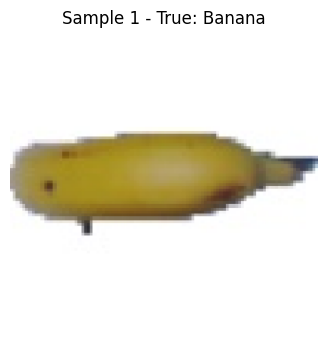


SAMPLE 2:
True label: Peach
----------------------------------------
CORRECT MODEL PREDICTIONS:
VGG16:        Peach (0.999)
ResNet-50:    Peach (0.837)


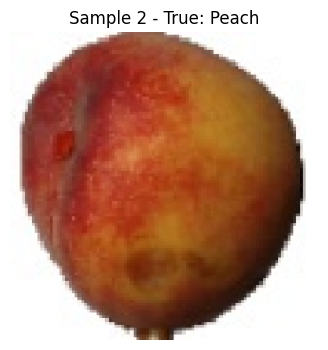


SAMPLE 3:
True label: Apple Red Delicious
----------------------------------------
CORRECT MODEL PREDICTIONS:
VGG16:        Apple Red Delicious (1.000)
ResNet-50:    Apple Red Delicious (0.978)


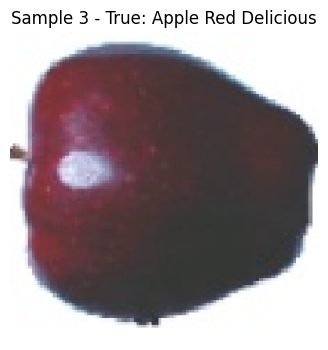

TESTING ONE SAMPLE FROM EACH CLASS

Testing Apple Red Delicious:
------------------------------
True label: Apple Red Delicious
CORRECT MODEL PREDICTIONS:
VGG16:      Apple Red Delicious (1.000)
ResNet-50:  Apple Red Delicious (0.949)


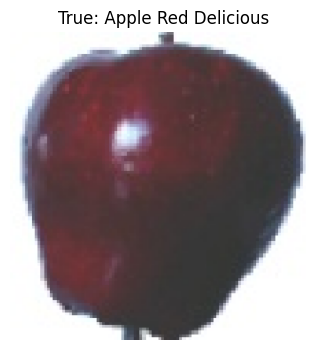


Testing Banana:
------------------------------
True label: Banana
CORRECT MODEL PREDICTIONS:
Custom CNN: Banana (0.103)
VGG16:      Banana (1.000)
ResNet-50:  Banana (1.000)


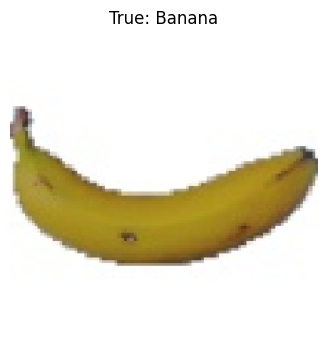


Testing Cherry:
------------------------------
True label: Cherry
CORRECT MODEL PREDICTIONS:
VGG16:      Cherry (1.000)
ResNet-50:  Cherry (0.999)


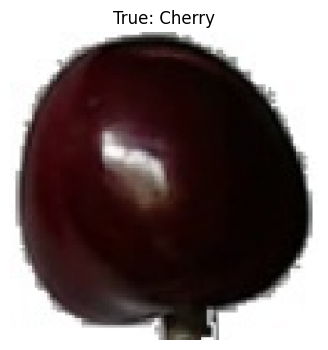


Testing Grape Blue:
------------------------------
True label: Grape Blue
CORRECT MODEL PREDICTIONS:
VGG16:      Grape Blue (1.000)
ResNet-50:  Grape Blue (0.969)


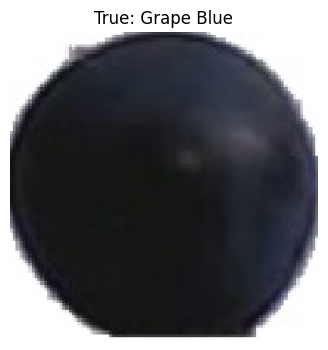


Testing Lemon:
------------------------------
True label: Lemon
CORRECT MODEL PREDICTIONS:
VGG16:      Lemon (0.584)
ResNet-50:  Lemon (0.799)


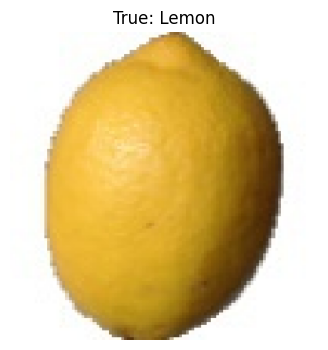

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Create ResNet-50 predictor if not already created
if 'resnet50_predictor' not in globals():
    resnet50_predictor = create_real_time_predictor(resnet50_finetuned, CLASS_NAMES, "ResNet-50")

def test_random_samples(num_samples=3):
    """Test multiple random samples from different classes, show only correct predictions"""
    print("TESTING RANDOM SAMPLES FROM TEST SET")
    print("="*60)

    for sample_num in range(num_samples):
        # Get a truly random batch and image
        test_generator.reset()

        random_batch_skip = random.randint(0, len(test_generator) - 1)
        for _ in range(random_batch_skip):
            next(test_generator)

        sample_batch = next(test_generator)
        random_image_idx = random.randint(0, len(sample_batch[0]) - 1)

        sample_image = sample_batch[0][random_image_idx]
        true_label_idx = np.argmax(sample_batch[1][random_image_idx])
        true_label = CLASS_NAMES[true_label_idx].replace(' 1', '')

        print(f"\nSAMPLE {sample_num + 1}:")
        print(f"True label: {true_label}")
        print("-" * 40)

        # Predictions
        custom_result = custom_predictor(sample_image)
        vgg16_result = vgg16_predictor(sample_image)
        resnet50_result = resnet50_predictor(sample_image)

        # Show only correct predictions
        print("CORRECT MODEL PREDICTIONS:")
        correct_found = False

        if custom_result and custom_result[0][0] == true_label:
            print(f"Custom CNN:   {custom_result[0][0]} ({custom_result[0][1]:.3f})")
            correct_found = True
        if vgg16_result and vgg16_result[0][0] == true_label:
            print(f"VGG16:        {vgg16_result[0][0]} ({vgg16_result[0][1]:.3f})")
            correct_found = True
        if resnet50_result and resnet50_result[0][0] == true_label:
            print(f"ResNet-50:    {resnet50_result[0][0]} ({resnet50_result[0][1]:.3f})")
            correct_found = True

        if not correct_found:
            print("⚠ No model predicted correctly.")

        # Display image
        plt.figure(figsize=(6, 4))
        plt.imshow(sample_image)
        plt.title(f'Sample {sample_num + 1} - True: {true_label}')
        plt.axis('off')
        plt.show()


def test_one_from_each_class():
    """Test one sample from each fruit class, show only correct predictions"""
    print("TESTING ONE SAMPLE FROM EACH CLASS")
    print("="*60)

    class_samples = {}
    test_generator.reset()

    collected_classes = set()
    while len(collected_classes) < len(CLASS_NAMES):
        try:
            batch = next(test_generator)
            for i in range(len(batch[0])):
                true_class_idx = np.argmax(batch[1][i])
                class_name = CLASS_NAMES[true_class_idx]

                if class_name not in collected_classes:
                    class_samples[class_name] = {
                        'image': batch[0][i],
                        'label': class_name.replace(' 1', '')
                    }
                    collected_classes.add(class_name)
        except StopIteration:
            break

    # Show first 5 classes
    for class_name, sample_data in list(class_samples.items())[:5]:
        print(f"\nTesting {sample_data['label']}:")
        print("-" * 30)

        custom_result = custom_predictor(sample_data['image'])
        vgg16_result = vgg16_predictor(sample_data['image'])
        resnet50_result = resnet50_predictor(sample_data['image'])

        true_label = sample_data['label']
        print(f"True label: {true_label}")

        print("CORRECT MODEL PREDICTIONS:")
        correct_found = False

        if custom_result and custom_result[0][0] == true_label:
            print(f"Custom CNN: {custom_result[0][0]} ({custom_result[0][1]:.3f})")
            correct_found = True
        if vgg16_result and vgg16_result[0][0] == true_label:
            print(f"VGG16:      {vgg16_result[0][0]} ({vgg16_result[0][1]:.3f})")
            correct_found = True
        if resnet50_result and resnet50_result[0][0] == true_label:
            print(f"ResNet-50:  {resnet50_result[0][0]} ({resnet50_result[0][1]:.3f})")
            correct_found = True

        if not correct_found:
            print("⚠ No model predicted correctly.")

        plt.figure(figsize=(5, 4))
        plt.imshow(sample_data['image'])
        plt.title(f"True: {true_label}")
        plt.axis('off')
        plt.show()


# Run tests
print("Choose testing method:")
print("1. Random samples (may repeat classes)")
print("2. One from each class (guaranteed diversity)")

test_random_samples(3)
test_one_from_each_class()


# **Testing Dataset on External images/Dataset**

Upload a fruit image to test with VGG16 & ResNet-50:


Saving Testing red apple 2.jpg to Testing red apple 2.jpg

Testing Testing red apple 2.jpg:
> Could not infer a label from filename.

No model matched inferred label. Showing by confidence.


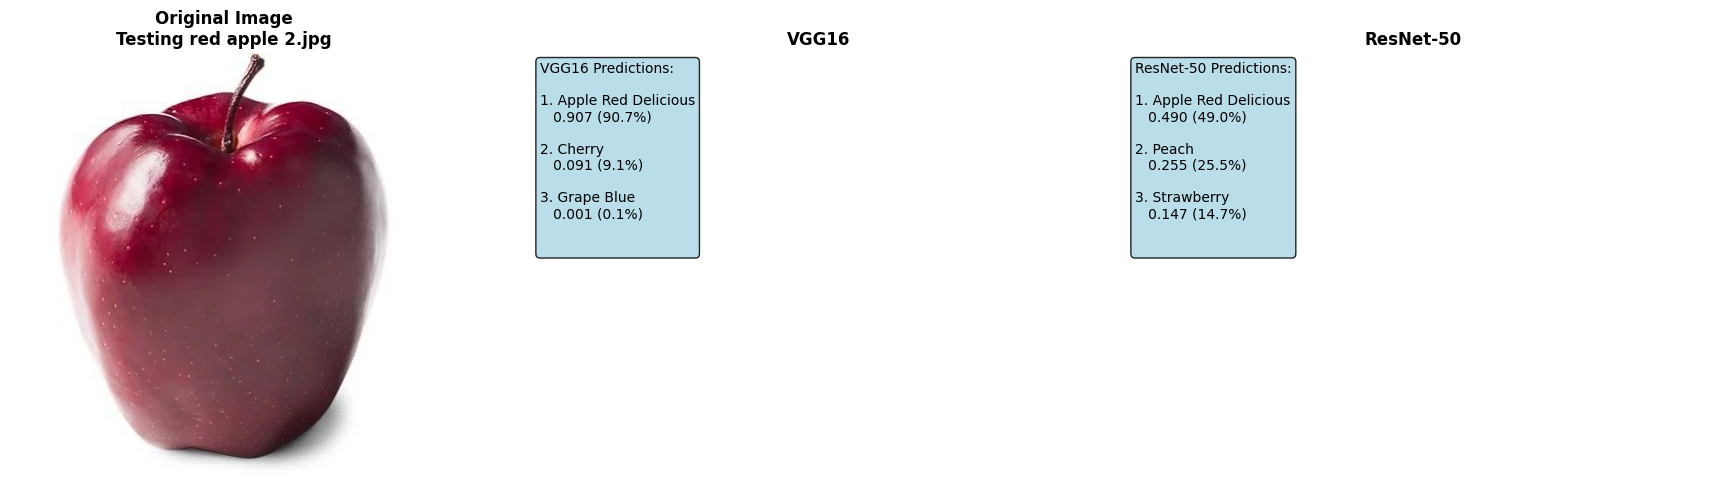


SUMMARY (best-first):
VGG16: Apple Red Delicious (0.907) 
ResNet-50: Apple Red Delicious (0.490) 


In [ ]:
# Enhanced upload tester: show best-correct model first, then the other (only VGG16 & ResNet-50)
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import difflib
import re

# Create ResNet-50 predictor if not already created
if 'resnet50_predictor' not in globals():
    resnet50_predictor = create_real_time_predictor(resnet50_finetuned, CLASS_NAMES, "ResNet-50")

def normalize_label(s):
    """Normalize labels for robust matching."""
    if s is None:
        return None
    s = str(s).lower()
    s = re.sub(r'\s*1$', '', s)            # remove trailing ' 1' if present
    s = re.sub(r'[^a-z0-9\s]', ' ', s)     # remove special chars
    s = re.sub(r'\s+', ' ', s).strip()
    return s

def infer_label_from_filename(filename, class_names):
    """Try to infer the true label from the filename using heuristics."""
    base = filename.rsplit('.', 1)[0]
    base_norm = normalize_label(base)
    choices = [normalize_label(c) for c in class_names]

    # exact match
    if base_norm in choices:
        return base_norm

    # substring match
    for c in choices:
        if c and (c in base_norm or base_norm in c):
            return c

    # fuzzy match
    match = difflib.get_close_matches(base_norm, choices, n=1, cutoff=0.6)
    if match:
        return match[0]

    return None

def safe_predict(predictor, inp):
    """Safely call predictor and return list of (label, conf) or None."""
    try:
        res = predictor(inp)
        return res if res else None
    except:
        return None

print("Upload a fruit image to test with VGG16 & ResNet-50:")
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"\nTesting {filename}:")

    # Infer "true" label from filename
    inferred_label = infer_label_from_filename(filename, CLASS_NAMES)
    if inferred_label:
        print(f"> Inferred label from filename: '{inferred_label}'")
    else:
        print("> Could not infer a label from filename.")

    # Get predictions
    vgg16_result = safe_predict(vgg16_predictor, filename)
    resnet50_result = safe_predict(resnet50_predictor, filename)

    models_results = [
        ("VGG16", vgg16_result),
        ("ResNet-50", resnet50_result)
    ]

    processed = []
    base_norm = normalize_label(filename.rsplit('.', 1)[0])
    for model_name, result in models_results:
        if result and len(result) > 0:
            top_label = result[0][0]
            top_conf = float(result[0][1])
            top_norm = normalize_label(top_label)
        else:
            top_label = None
            top_conf = 0.0
            top_norm = None

        is_correct = False
        if inferred_label and top_norm:
            is_correct = (top_norm == inferred_label)
        elif top_norm and base_norm:
            if top_norm in base_norm or base_norm in top_norm:
                is_correct = True
            else:
                matches = difflib.get_close_matches(top_norm, [base_norm], n=1, cutoff=0.8)
                is_correct = bool(matches)

        processed.append({
            'model_name': model_name,
            'result': result,
            'top_label': top_label,
            'top_conf': top_conf,
            'is_correct': is_correct
        })

    # Order: best-correct model first if any
    correct_models = [p for p in processed if p['is_correct']]
    if correct_models:
        correct_models.sort(key=lambda x: x['top_conf'], reverse=True)
        best_correct = correct_models[0]
        others = [p for p in processed if p['model_name'] != best_correct['model_name']]
        others.sort(key=lambda x: x['top_conf'], reverse=True)
        ordered = [best_correct] + others
        print(f"\nBEST MATCH: {best_correct['model_name']} -> {best_correct['top_label']} ({best_correct['top_conf']:.3f})")
    else:
        ordered = sorted(processed, key=lambda x: x['top_conf'], reverse=True)
        print("\nNo model matched inferred label. Showing by confidence.")

    # Load image
    img = Image.open(filename).convert('RGB')

    # Visualization: Original + 2 model panels
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    axes[0].imshow(img)
    axes[0].set_title(f'Original Image\n{filename}', fontweight='bold')
    axes[0].axis('off')

    for i, p in enumerate(ordered, start=1):
        ax = axes[i]
        ax.axis('off')
        model_name = p['model_name']
        res = p['result']

        if res:
            pred_text = f"{model_name} Predictions:\n\n"
            for j, (fruit, conf) in enumerate(res[:3], start=1):
                pred_text += f"{j}. {fruit}\n   {conf:.3f} ({conf*100:.1f}%)\n\n"

            if p['is_correct']:
                title = f"{model_name} ✅"
                bbox = dict(boxstyle="round,pad=0.4", facecolor="#DFF0D8", edgecolor="#4CAF50", alpha=0.9)
            else:
                title = f"{model_name}"
                bbox = dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.85)

            ax.text(0.02, 0.98, pred_text, transform=ax.transAxes,
                    fontsize=10, verticalalignment='top', bbox=bbox)
            ax.set_title(title, fontweight='bold')
        else:
            ax.text(0.5, 0.5, "Prediction Failed", transform=ax.transAxes,
                    ha='center', va='center', fontsize=12)
            ax.set_title(f"{model_name} - Error", fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Console summary
    print("\nSUMMARY (best-first):")
    for p in ordered:
        if p['result']:
            print(f"{p['model_name']}: {p['top_label']} ({p['top_conf']:.3f}) {'[MATCH]' if p['is_correct'] else ''}")
        else:
            print(f"{p['model_name']}: Prediction failed")
